In [29]:
import pandas as pd 
import numpy as np
import scipy 
movies=pd.read_csv("fandango_score_comparison.csv")
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


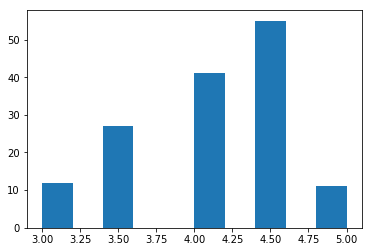

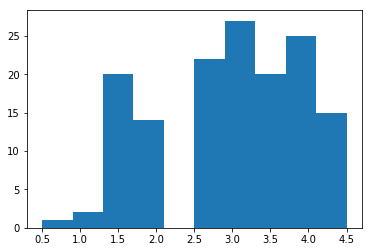

In [30]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.hist(movies['Fandango_Stars'])
plt.show()
fig,ax=plt.subplots()
ax.hist(movies['Metacritic_norm_round'])
plt.show()

In [31]:
print(movies['Metacritic_norm_round'].describe())
print(movies['Metacritic_norm_round'].median())

count    146.000000
mean       2.972603
std        0.990961
min        0.500000
25%        2.125000
50%        3.000000
75%        4.000000
max        4.500000
Name: Metacritic_norm_round, dtype: float64
3.0


In [32]:
print(movies['Fandango_Stars'].describe())
print(movies['Fandango_Stars'].median())

count    146.000000
mean       4.089041
std        0.540386
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64
4.0


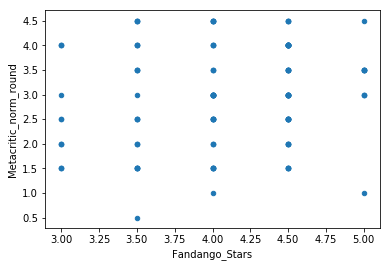

In [33]:
movies[['Fandango_Stars','Metacritic_norm_round']].plot(x='Fandango_Stars',y='Metacritic_norm_round',kind='scatter')
plt.show()

In [38]:
movies['fm_diff']=np.abs(movies['Metacritic_norm_round']-movies['Fandango_Stars'])
movies.sort_values('fm_diff',ascending=False)['FILM'].head()

3       Do You Believe? (2015)
85           Little Boy (2015)
47                Annie (2014)
19               Pixels (2015)
134    The Longest Ride (2015)
Name: FILM, dtype: object

In [42]:
movies[['Fandango_Stars','Metacritic_norm_round']].corr()


,Fandango_Stars,Metacritic_norm_round
Fandango_Stars,1.000000,0.178449
Metacritic_norm_round,0.178449,1.000000


In [49]:
from scipy import stats

slope,intercept, r_value, p_value, slope_std_error = stats.linregress( movies['Metacritic_norm_round'],movies['Fandango_Stars'])

predict_3=slope*3+intercept
predict_3                                       
                            

4.0917071528212041

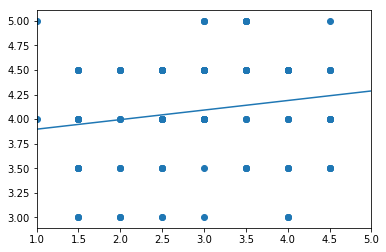

In [56]:
import matplotlib.pyplot as plt
predict_1=slope*1+intercept
predict_5=slope*5+intercept
x=[1,5]
y=[predict_1,predict_5]
fig,ax=plt.subplots()
ax.plot(x,y)
ax.scatter(movies['Metacritic_norm_round'],movies['Fandango_Stars'])
ax.set_xlim(1,5)
plt.show()
